## Package import

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,precision_recall_curve,average_precision_score
 
import numpy as np

## Dataset preprocessing and splitting

In [26]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3149)

## Grid Search for hyperparameter tuning

In [ ]:
param_grid = {
    'C': np.linspace(0.5, 1.5, 10),  # 正则化
    'penalty': ['l1', 'l2'],
    'solver': ["liblinear","saga"],
    'max_iter': np.arange(50, 150, 10),  # 迭代次数
    'class_weight': [None, 'balanced'], 
    'fit_intercept': [True, False], 
    'intercept_scaling': [1, 2],  
    'multi_class': ['auto', 'ovr'], 
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)
print("最佳模型:", grid_search.best_estimator_)



## Train and test the model

In [ ]:
model = LogisticRegression(C=np.float64(0.8), 
                           fit_intercept=False,
                           max_iter=np.int64(110), 
                           multi_class='auto', 
                           penalty='l1',
                           solver='saga'
                           )
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

## Model evaluation

准确率 (Accuracy): 0.97
精确率 (Precision): 0.96
召回率 (Recall): 0.99
F1 分数 (F1 Score): 0.97


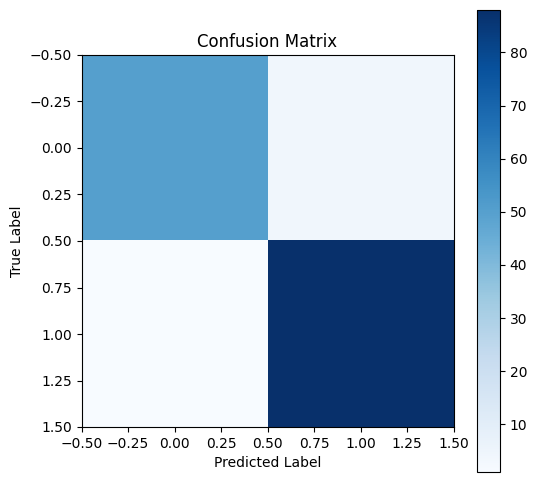

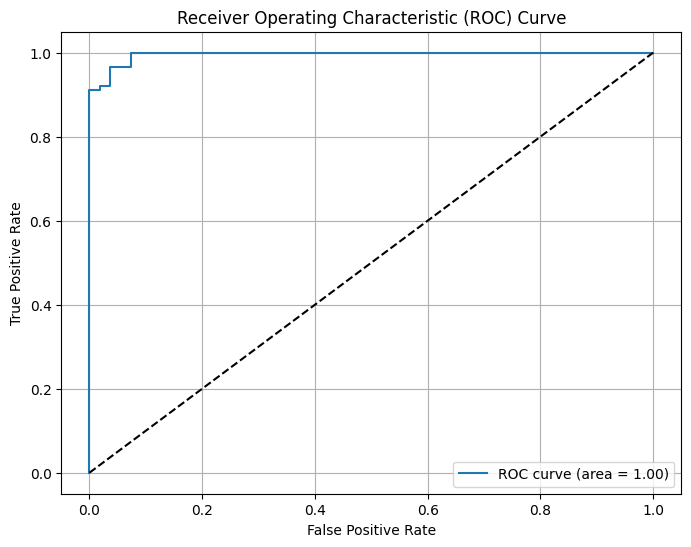

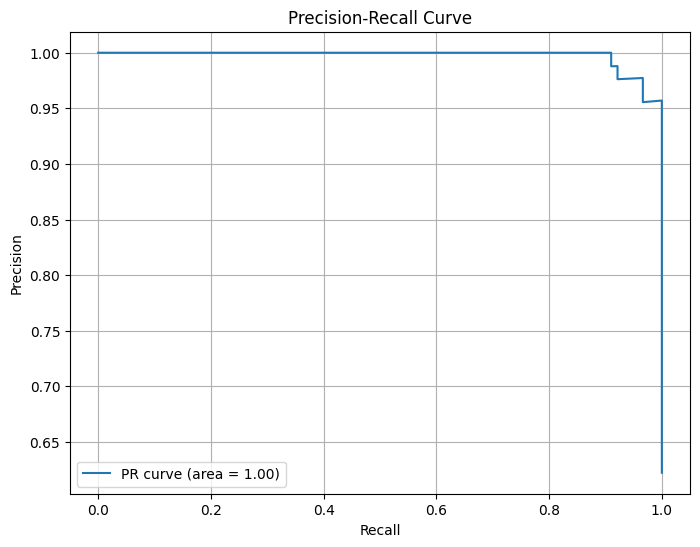

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'准确率 (Accuracy): {accuracy:.2f}')
print(f'精确率 (Precision): {precision:.2f}')
print(f'召回率 (Recall): {recall:.2f}')
print(f'F1 分数 (F1 Score): {f1:.2f}')



conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()